In [1]:

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

## Сделайте предсказание успешности поста на Facebook на нескольких переменных. 
#### Вы можете использовать любой показатель успешности, любой набор предикторов, любые преобразования, главное - пояснить свой выбор. 
Используйте библиотеку statsmodels и не забудьте удалить все лишнее

In [2]:
df = pd.read_csv('dataset_Facebook.csv', sep = ';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [3]:
df.columns = ['TotalLikes', 'Type', 'Category', 'Month', 'Weekday', 'Hour','Paid', 'Reach', 'Impressions','Engaged',
             'Consumers', 'Consumptions', 'ImpessionsLiked', 'ReachLiked', 'EngagedLiked', 'comment', 'like', 'share', 'total']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TotalLikes       500 non-null    int64  
 1   Type             500 non-null    object 
 2   Category         500 non-null    int64  
 3   Month            500 non-null    int64  
 4   Weekday          500 non-null    int64  
 5   Hour             500 non-null    int64  
 6   Paid             499 non-null    float64
 7   Reach            500 non-null    int64  
 8   Impressions      500 non-null    int64  
 9   Engaged          500 non-null    int64  
 10  Consumers        500 non-null    int64  
 11  Consumptions     500 non-null    int64  
 12  ImpessionsLiked  500 non-null    int64  
 13  ReachLiked       500 non-null    int64  
 14  EngagedLiked     500 non-null    int64  
 15  comment          500 non-null    int64  
 16  like             499 non-null    float64
 17  share           

Для целевой переменной я взяла количество лайков у поста, так как это важный показатель, отражающий многие факторы в соцсетях и, главное, поддающийся оценке. В качестве объясняющих переменных я выбрала номер месяца, день недели и час, так как эти переменные могут оказывать влияние на активность пользователей в социальных сетях. Номер месяца может отражать сезонные тренды, день недели показывает дни с повышенной активностью пользователей (например, выходные), час дня может отражать пики активности пользователей (например, вечер). 

In [5]:
import statsmodels.formula.api as smf
model = smf.ols('like~Month + Weekday + Hour', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   like   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.291
Date:                Wed, 25 Oct 2023   Prob (F-statistic):              0.277
Time:                        23:43:51   Log-Likelihood:                -3589.3
No. Observations:                 499   AIC:                             7187.
Df Residuals:                     495   BIC:                             7203.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    225.1442     54.151      4.158      0.000     118.751     331.538
Month          2.3438      4.447      0.527      0.598      -6.394      11.082
Weekday      -13.0463      7.138     -1.828      0.068     -27.072       0.979
Hour          -1.2228      3.368     -0.363      0.717      -7.840       5.395
==============================================================================
Omnibus:                      790.854   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           295485.250
Skew:                           8.894   Prob(JB):                         0.00
Kurtosis:                     120.878   Cond. No.                         44.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Исходя из данных, можно сделать следующие выводы:

- Значение R-квадрата составляет 0.008, что указывает на то, что модель объясняет только небольшую часть изменчивости зависимой переменной.
- Скорректированное значение R-квадрата составляет 0.002 - что модель не учитывает большую часть изменчивости с учетом числа предикторов.
- F-статистика - 1.291, и соответствующее значение вероятности составляет 0.277. Это говорит о том, что модель не является статистически значимой и не предоставляет достаточно доказательств в пользу значимого влияния предикторов на зависимую переменную.

- Тест Omnibus показывает, что остатки не имеют нормальное распределение (Prob(Omnibus) близко к 0).
- Значение Skew говорит о наличии асимметрии в данных.
- Значение Kurtosis указывает на высокий эксцесс, что может означать наличие выбросов.
- Тест Durbin-Watson показывает независимость остатков (значение находится в промежутке между 1 и 2).
- Тест Jarque-Bera также указывает на ненормальность остатков (Prob(JB) близко к 0).
- Значение Condition Number (44.7) свидетельствует о наличии мультиколлинеарности.

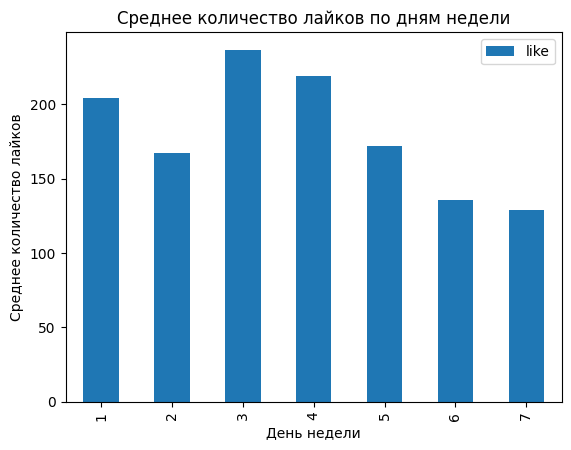

In [6]:
piv_week = df.pivot_table(
    index='Weekday',
    values='like',
    aggfunc='mean'
)
piv_week.plot(kind='bar')

plt.xlabel('День недели')
plt.ylabel('Среднее количество лайков')
plt.title('Среднее количество лайков по дням недели')

plt.show()


Наблюдается снижение в первые два дня недели, повышение на 3 день, а затем плавное снижение до конца недели

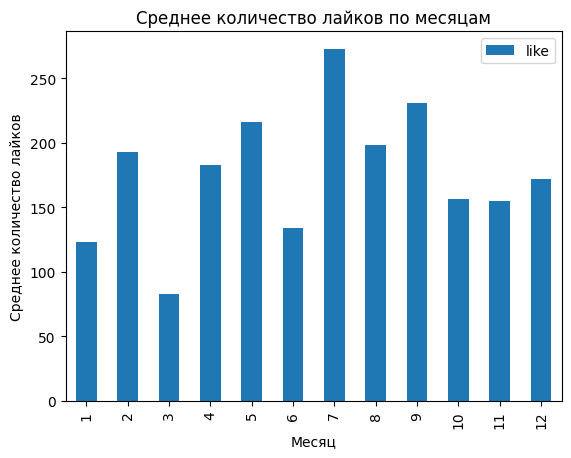

In [7]:
piv_mon = df.pivot_table(
    index='Month',
    values='like',
    aggfunc='mean'
)
piv_mon.plot(kind='bar')

plt.xlabel('Месяц')
plt.ylabel('Среднее количество лайков')
plt.title('Среднее количество лайков по месяцам')

plt.show()


Сложно выявить закономерность по дням месяца, видно, что нет какой-то тенденции к изменению

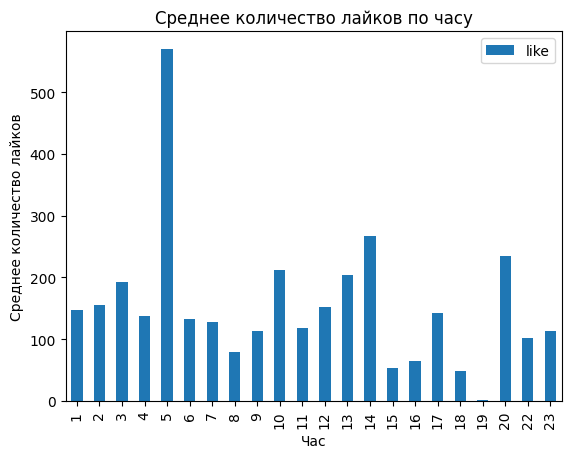

In [8]:
piv_h = df.pivot_table(
    index='Hour',
    values='like',
    aggfunc='mean'
)
piv_h.plot(kind='bar')

plt.xlabel('Час')
plt.ylabel('Среднее количество лайков')
plt.title('Среднее количество лайков по часу')

plt.show()

Пик активности приходится на 5 часов, меньше всего - в 19ч. Остальное время распределено примерно одинаково

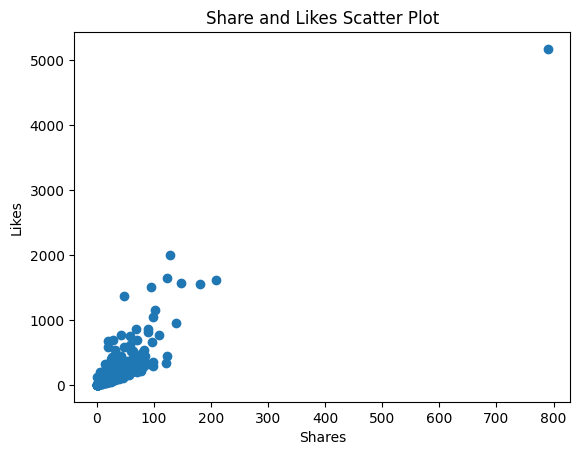

In [9]:
# Вторая модель: добавим количество репостов - повышающих охват, а значит, и кол-во лайков
plt.scatter(df['share'], df['like'])
plt.xlabel('Shares')
plt.ylabel('Likes')
plt.title('Share and Likes Scatter Plot')
plt.show()

Похоже, что есть зависимость лайков от репостов

In [10]:
model2 = smf.ols('like~Month + Weekday + Hour + share', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   like   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     568.5
Date:                Wed, 25 Oct 2023   Prob (F-statistic):          1.07e-182
Time:                        23:43:52   Log-Likelihood:                -3142.1
No. Observations:                 496   AIC:                             6294.
Df Residuals:                     491   BIC:                             6315.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -45.7427     23.721     -1.928      0.054     -92.350       0.865
Month          5.4419      1.892      2.876      0.004       1.724       9.160
Weekday       -5.9986      3.045     -1.970      0.049     -11.982      -0.015
Hour           2.9959      1.433      2.091      0.037       0.180       5.811
share          6.8893      0.145     47.473      0.000       6.604       7.174
==============================================================================
Omnibus:                      405.468   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10598.385
Skew:                           3.370   Prob(JB):                         0.00
Kurtosis:                      24.620   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-квадрат равен 0.822, что означает, что 82.2% лайков объясняется независимыми переменными.
- F-статистика = 568.5, а вероятность составляет 1.07e-182, что указывает на статистическую значимость модели.
- Omnibus/Prob(Omnibus) тест показал, что распределение остатков не является нормальным, значение близко к нулю.
- Skew показывает, что данные не симметричны.
- Kurtosis указывает на высокий эксцесс данных.
- Durbin-Watson тест показывает, что остатки имеют независимость и отсутствие автокорреляции.
- Jarque-Bera (JB)/Prob(JB) тест также показывает, что распределение остатков не является нормальным, так как значение Prob(JB) близко к нулю.
- Значение Condition Number указывает на умеренную чувствительность результата к изменениям предикторов.

## Таким образом, несмотря на некоторые ограничения (например, ненормальность остатков) модель 2 демонстрирует лучшие показатели по R-квадрат, F-статистике, Log-Likelihood, AIC и BIC, что говорит о ее лучшей предсказательной способности по сравнению с моделью 1. 
